## use pretrained vgg16 model

In [9]:
!pip install --upgrade --force-reinstall --no-deps kaggle
!kaggle -v

Processing /root/.cache/pip/wheels/94/a7/09/68dc83c7c14fdbdf5d3f2b2da5b87e587bfc1e85df69b1130c/kaggle-1.5.8-cp36-none-any.whl
  Found existing installation: kaggle 1.5.8
    Uninstalling kaggle-1.5.8:
      Successfully uninstalled kaggle-1.5.8
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.6/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.6/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [11]:
from google.colab import files
uploadedFile = files.upload()

MessageError: ignored

In [ ]:
#before importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#import the dataset we want to use for our project
!!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

['Downloading dogs-vs-cats-redux-kernels-edition.zip to /content',
 '',
 '  0% 0.00/814M [00:00<?, ?B/s]',
 '  1% 5.00M/814M [00:01<03:53, 3.63MB/s]',
 '  3% 21.0M/814M [00:01<02:41, 5.14MB/s]',
 '  4% 33.0M/814M [00:02<02:15, 6.04MB/s]',
 '  5% 41.0M/814M [00:03<01:44, 7.74MB/s]',
 '  7% 58.0M/814M [00:03<01:12, 10.9MB/s]',
 '  8% 66.0M/814M [00:04<01:21, 9.64MB/s]',
 '  9% 73.0M/814M [00:04<01:03, 12.3MB/s]',
 ' 10% 81.0M/814M [00:04<00:49, 15.4MB/s]',
 ' 12% 97.0M/814M [00:05<00:37, 20.0MB/s]',
 ' 13% 105M/814M [00:06<00:52, 14.3MB/s] ',
 ' 15% 121M/814M [00:06<00:39, 18.3MB/s]',
 ' 16% 129M/814M [00:06<00:38, 18.4MB/s]',
 ' 17% 137M/814M [00:07<00:49, 14.3MB/s]',
 ' 19% 153M/814M [00:07<00:36, 18.9MB/s]',
 ' 21% 169M/814M [00:09<00:41, 16.2MB/s]',
 ' 22% 180M/814M [00:09<00:30, 21.8MB/s]',
 ' 24% 193M/814M [00:09<00:22, 28.5MB/s]',
 ' 25% 201M/814M [00:10<00:47, 13.5MB/s]',
 ' 27% 221M/814M [00:10<00:33, 18.8MB/s]',
 ' 29% 233M/814M [00:11<00:33, 18.3MB/s]',
 ' 30% 241M/814M [00:12

In [ ]:
from zipfile import ZipFile
fname='dogs-vs-cats-redux-kernels-edition.zip'
with ZipFile(fname,'r') as zip:
  zip.extractall()
  print('done')
# main zip file extract karva

from zipfile import ZipFile
fname='train.zip'
with ZipFile(fname,'r') as zip:
  zip.extractall()
  print('done')

done
done


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

In [ ]:
#used to set gpu
physical_devices=tf.config.experimental.list_physical_devices('GPU')
print('gpus: ',len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

gpus:  1


In [ ]:
#change the name of train dir to dogs-vs -cats in folders
os.chdir('dogs-vs-cats')
if os.path.isdir('train/dog') is False:
  os.makedirs('train/dog')
  os.makedirs('train/cat')
  os.makedirs('valid/dog')
  os.makedirs('valid/cat')
  os.makedirs('test/dog')
  os.makedirs('test/cat')

  for c in random.sample(glob.glob('cat*'),1000):
    shutil.move(c,'train/cat')
  for c in random.sample(glob.glob('dog*'),1000):
    shutil.move(c,'train/dog')
  for c in random.sample(glob.glob('cat*'),200):
    shutil.move(c,'valid/cat')
  for c in random.sample(glob.glob('dog*'),200):
    shutil.move(c,'valid/dog')
  for c in random.sample(glob.glob('cat*'),100):
    shutil.move(c,'test/cat')
  for c in random.sample(glob.glob('dog*'),100):
    shutil.move(c,'test/dog')
  

In [ ]:
os.chdir('../')

In [ ]:
train_path='dogs-vs-cats/train'
valid_path='dogs-vs-cats/valid'
test_path='dogs-vs-cats/test'

In [ ]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
  .flow_from_directory(directory=train_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)
valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
  .flow_from_directory(directory=valid_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
  .flow_from_directory(directory=test_path,target_size=(224,224),classes=['cat','dog'],batch_size=10,shuffle=False)

Found 2000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
 imgs,labels=next(train_batches)

In [ ]:
#directly copied from tf website
def plotImages(images_arr):
  
  fig,axes=plt.subplots(1,10,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(images_arr,axes):
    
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

In [ ]:
vgg16_model=tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 22s 0us/step


In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
 model=Sequential()
 for layer in vgg16_model.layers[:-1]:
   model.add(layer)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [ ]:
type(vgg16_model)

tensorflow.python.keras.engine.functional.Functional

In [ ]:
for layer in model.layers:
  layer.trainable=False

In [ ]:
model.add(Dense(units=2,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=10,verbose=2)

Epoch 1/10
200/200 - 28s - loss: 0.2605 - accuracy: 0.8905 - val_loss: 0.0909 - val_accuracy: 0.9650
Epoch 2/10
200/200 - 28s - loss: 0.0798 - accuracy: 0.9725 - val_loss: 0.0705 - val_accuracy: 0.9775
Epoch 3/10
200/200 - 29s - loss: 0.0554 - accuracy: 0.9815 - val_loss: 0.0718 - val_accuracy: 0.9700
Epoch 4/10
200/200 - 29s - loss: 0.0413 - accuracy: 0.9865 - val_loss: 0.0611 - val_accuracy: 0.9725
Epoch 5/10
200/200 - 29s - loss: 0.0310 - accuracy: 0.9895 - val_loss: 0.0586 - val_accuracy: 0.9775
Epoch 6/10
200/200 - 28s - loss: 0.0237 - accuracy: 0.9930 - val_loss: 0.0547 - val_accuracy: 0.9800
Epoch 7/10
200/200 - 28s - loss: 0.0196 - accuracy: 0.9945 - val_loss: 0.0528 - val_accuracy: 0.9850
Epoch 8/10
200/200 - 28s - loss: 0.0146 - accuracy: 0.9975 - val_loss: 0.0531 - val_accuracy: 0.9800
Epoch 9/10
200/200 - 28s - loss: 0.0126 - accuracy: 0.9985 - val_loss: 0.0520 - val_accuracy: 0.9775
Epoch 10/10
200/200 - 28s - loss: 0.0104 - accuracy: 0.9995 - val_loss: 0.0506 - val_accura

In [ ]:
predictions=model.predict(x=test_batches,verbose=2)

20/20 - 2s


In [ ]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
cm=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))

In [ ]:
#copy directly from sklearn website
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes,rotation=0)

  if normalize:
    cm=cm.astype('float')/am.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix,without normalization")
  
  print(cm)

  thresh=cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [ ]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix,without normalization
[[100   0]
 [  3  97]]


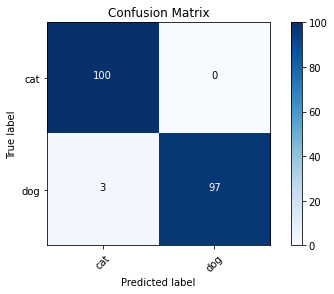

In [ ]:
cm_plot_labels=['cat','dog']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels)